In [37]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

In [38]:
directory = os.getcwd()
print(directory)
df = pd.read_csv("../data/BrentOilPrices.csv")
df.head()

c:\Users\King Betse\Desktop\kifiya-AIM-W10\notebooks


,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


## Data Cleaning

### Removing Duplicate

In [39]:
df.drop_duplicates(inplace=True)

df.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


### Handling Missing Values


In [40]:
missing_values = df.isnull().sum()
missing_values


Date     0
Price    0
dtype: int64

### Drop rows with Negative Prices


In [41]:

# df = df[df['Price'] >= 0]
df.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


### Handling Outliner

In [42]:
from scipy import stats
df = df[(np.abs(stats.zscore(df['Price'])) < 3)]
upper_limit = df['Price'].quantile(0.95)
lower_limit = df['Price'].quantile(0.05)
df['Price'] = np.where(df['Price'] > upper_limit, upper_limit, df['Price'])
df['Price'] = np.where(df['Price'] < lower_limit, lower_limit, df['Price'])

###  Scale numerical features

In [43]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# df[['Price']] = scaler.fit_transform(df[['Price']])

# print(df.info())
# print(df.describe())

### Visualize Price Trends


C:\Users\King Betse\AppData\Local\Temp\ipykernel_34552\4223071434.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


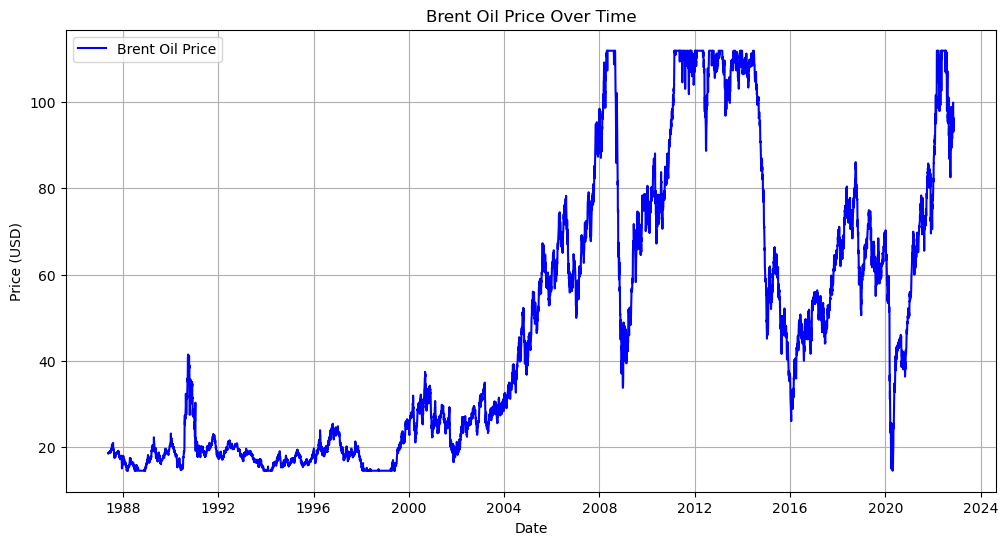

In [44]:
import matplotlib.pyplot as plt

# Convert 'date' column to datetime if necessary
df['Date'] = pd.to_datetime(df['Date'])

# Plotting the price trend
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], label='Brent Oil Price', color='blue')
plt.title('Brent Oil Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

### Unemployment Rates and GDP

In [ ]:
# Load unemployment rates and GDP
unemployment_data = pd.read_csv('../data/UNRATE.csv', parse_dates=['Date'])
GDP = pd.read_csv('../data/GDP.csv', parse_dates=['Date'])

# Merge Datasets
merged_data = pd.merge(df, unemployment_data, on='Date', how='inner')
merged_data = pd.merge(merged_data, GDP, on='Date', how='inner')
merged_data.rename(columns={'Price': 'Brent_Oil_Price', 'UNRATE': 'Unemployment_Rate','GDP': 'GDP_Billion'}, inplace=True)
merged_data.head()

,Date,Brent_Oil_Price,Unemployment_Rate
0,1987-06-01,18.65,6.2
1,1987-07-01,18.98,6.1
2,1987-09-01,18.43,5.9
3,1987-10-01,18.50,6.0
4,1987-12-01,17.65,5.7


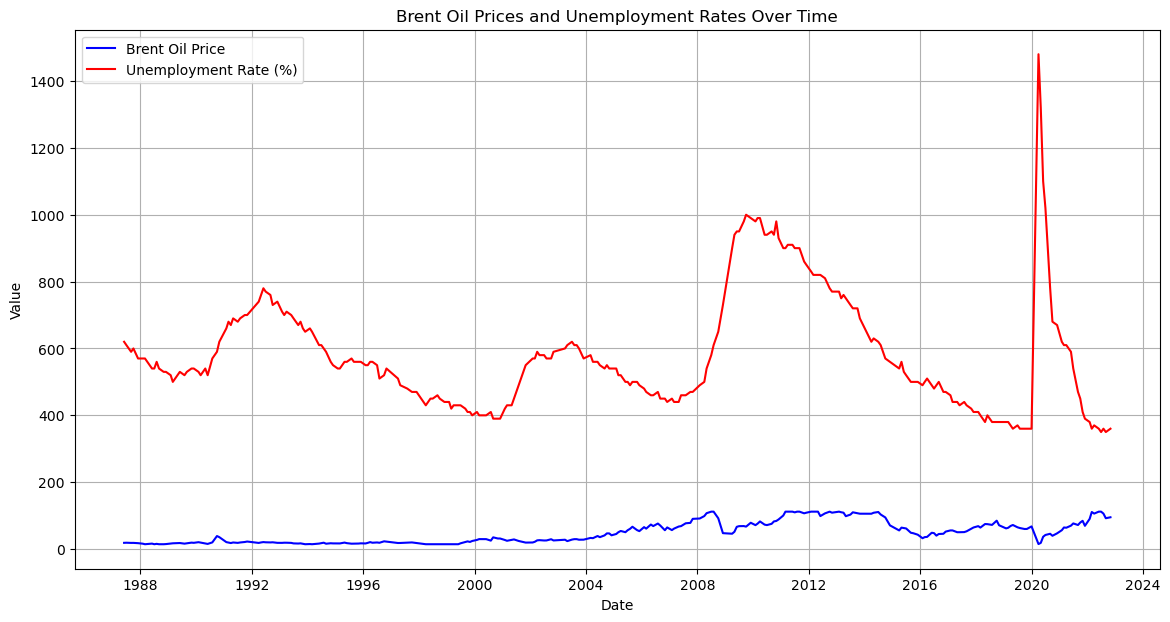

In [46]:
# Step 3: Data Visualization
plt.figure(figsize=(14, 7))
plt.plot(merged_data['Date'], merged_data['Brent_Oil_Price'], label='Brent Oil Price', color='blue')
plt.plot(merged_data['Date'], merged_data['Unemployment_Rate'] * 100, label='Unemployment Rate (%)', color='red')  # Scale for better visualization
plt.title('Brent Oil Prices and Unemployment Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()